In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'pandas_profiling'

In [34]:
import sys
!{sys.executable} -m pip install pandas-profiling[Notebook]

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=133aaee1c3c2896e257c7281a4c1ac60e4e9da57cd6da1e67a58ff8e228497d6
  Stored in directory: c:\users\jacki\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=b93140316be61d229d863236622dca62cc0adc5fe0d670dcaad59622d775cf01
  Stored in directory: c:\users\jacki\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash


In [37]:
from pandas_profiling import ProfileReport as pp

In [3]:
#Upload the dataframe to figure out what we're looking at

df = pd.read_csv(r'C:\Users\jacki\Downloads\disney_movies_total_gross.csv')
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [41]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Question 1: What ratings make Disney the most money?

df_rating = df.groupby('mpaa_rating').sum().sort_values(by=['total_gross'], ascending=False).reset_index()
df_rating.head()

,mpaa_rating,total_gross,inflation_adjusted_gross
0,PG,13767914371,18988248082
1,PG-13,11771207588,14927544680
2,G,7919792693,25048445571
3,R,2995266596,5641192166
4,Not Rated,151387769,899620238


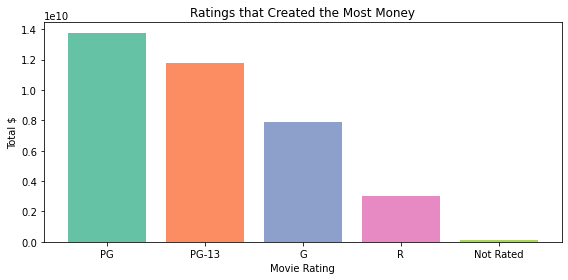

In [20]:
#Looking at the above question in bargraph form

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('Set2')
plt.bar(df_rating['mpaa_rating'], df_rating['total_gross'], color=colors[:])
plt.xlabel('Movie Rating')
plt.ylabel('Total $')
plt.title('Ratings that Created the Most Money')
plt.show()

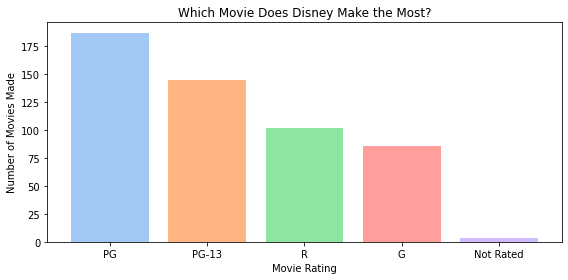

In [131]:
#However, this photo could be a little misleading. These movies make the most money because disney makes the first two the most.

df_rating = df.groupby('mpaa_rating').count().sort_values(by=['total_gross'], ascending=False).reset_index()
df_rating.head()

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(df_rating['mpaa_rating'], df_rating['movie_title'], color=colors[:5])
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies Made')
plt.title('Which Movie Does Disney Make the Most?')
plt.show()

#However, we see that R is made more than G, but G beat out R rated movies for total gross $ by a long shot.

In [50]:
#So what is the top grossed R movie by Disney then?
rating_filter = ['R']
df_r = df[df['mpaa_rating'].isin(rating_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_r.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,87,Pretty Woman,1990-03-23,Romantic Comedy,R,178406268,356389765
1,250,Ransom,1996-11-08,Action,R,136492681,259807820
2,241,The Rock,1996-06-07,Action,R,134069511,255702705
3,61,Good Morning Vietnam,1987-12-23,Comedy,R,123922370,254414837
4,296,Enemy of the State,1998-11-20,Action,R,111549836,198472008


In [51]:
#So what is the top grossed G movie by Disney then?
rating_filter = ['G']
df_g = df[df['mpaa_rating'].isin(rating_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_g.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,179,The Lion King,1994-06-15,Adventure,G,422780140,761640898
1,499,Toy Story 3,2010-06-18,Adventure,G,415004880,443408255
2,384,Finding Nemo,2003-05-30,Adventure,G,380529370,518148559
3,351,"Monsters, Inc.",2001-11-02,Adventure,G,289423425,416073179
4,533,Monsters University,2013-06-21,Adventure,G,268488329,278395641


In [154]:
rating_filter = ['G','R']
df_mpaa = df[df['mpaa_rating'].isin(rating_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_mpaa = pd.pivot_table(df_mpaa, index=['mpaa_rating'], columns=['year'] ,values=['total_gross'], aggfunc='count').T
df_mpaa.reset_index(inplace=True)
df_mpaa = df_mpaa.set_index('year')
df_mpaa.head()

mpaa_rating,level_0,G,R
year,,,
1937,total_gross,1.0,NaN
1940,total_gross,2.0,NaN
1946,total_gross,1.0,NaN
1950,total_gross,1.0,NaN
1955,total_gross,1.0,NaN


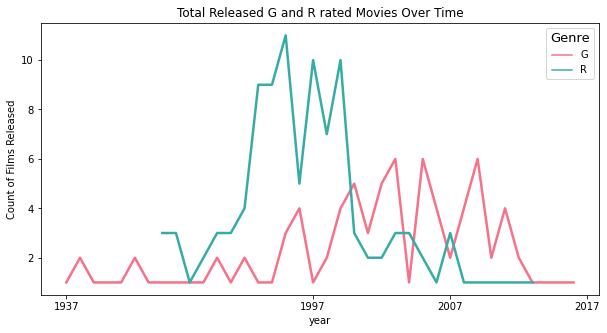

In [169]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_mpaa, palette='husl', dashes= False, linewidth=2.5)
ax.set(xlabel='year', ylabel='Count of Films Released', title='Total Released G and R rated Movies Over Time', xticks=['1937','1997','2007','2017'])
ax.legend(title='Genre', title_fontsize = 13)
plt.show()

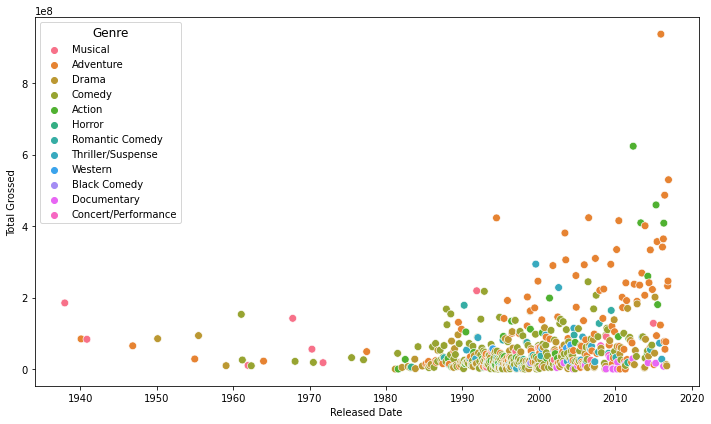

In [96]:
#How has Disney's movies total grossed changed over time, per genre?
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='release_date', y='total_gross', hue='genre', palette="husl", s=60)
ax.set(xlabel='Released Date', ylabel='Total Grossed')
ax.legend(title='Genre', title_fontsize = 12) 
plt.show()

In [99]:
#We can see that Adventure, Action, and Musical movies have taken off or consistently done well, but what are these movies creating such sharp incline?

genre_filter = ['Action']
df_genre_musical = df[df['genre'].isin(genre_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_genre_musical.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year,month,day,Year
0,524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224,2012,05,04,2012
1,558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868,2015,05,01,2015
2,532,Iron Man 3,2013-05-03,Action,PG-13,408992272,424084233,2013,05,03,2013
3,569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349,2016,05,06,2016
4,544,Captain America: The Winter Soldier,2014-04-04,Action,PG-13,259746958,268013076,2014,04,04,2014


In [55]:
#Adventure

genre_filter = ['Adventure']
df_genre_adventure = df[df['genre'].isin(genre_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_genre_adventure.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
1,578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936
2,571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
3,441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,544817142
4,179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [56]:
#Musical

genre_filter = ['Musical']
df_genre_musical = df[df['genre'].isin(genre_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_genre_musical.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667
1,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
2,13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
3,553,Into the Woods,2014-12-25,Musical,PG,128002372,130894237
4,474,High School Musical 3: Senior Year,2008-10-24,Musical,G,90559416,106308538


In [127]:
#I want to look at the adventure,action, and musical over time in the same graph
#Pre-processing my data

df_genre = df
df_genre['release_date'] = pd.to_datetime(df['release_date'])
df_genre.reset_index()

genre_filter = ['Musical','Adventure','Action']
df_genre = df[df['genre'].isin(genre_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_genre = pd.pivot_table(df_genre, index=['genre'], columns=['year'] ,values=['total_gross'], aggfunc=np.sum).T
df_genre.reset_index(inplace=True)
df_genre = df_genre.set_index('year')


In [122]:
#This data does not get used, but it was a way for me to verify the above numbers

df_barplot = df
df_barplot['release_date'] = pd.to_datetime(df_barplot['release_date'])
df_barplot.reset_index()

genre_filter = ['Adventure','Action','Musical']
df_barplot = df_barplot[df_barplot['genre'].isin(genre_filter)].sort_values(by=['total_gross'], ascending=False).reset_index()

df_barplot = df_barplot.drop(['index', 'Year','inflation_adjusted_gross'], axis = 1)
df_barplot = df_barplot.groupby(['genre','year']).sum().sort_values(by=['total_gross'], ascending=False).reset_index()


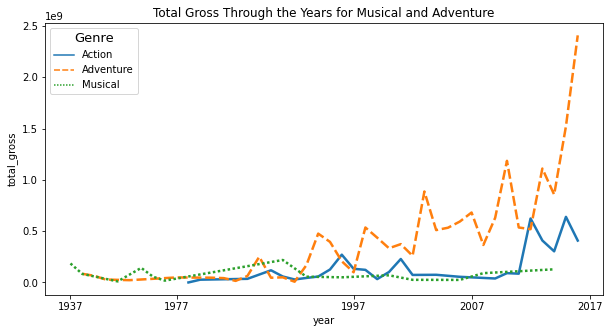

In [126]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_genre, linewidth=2.5)
ax.set(xlabel='year', ylabel='total_gross', title='Total Gross Through the Years for Musical and Adventure', xticks=['1937','1977','1997','2007','2017'])
ax.legend(title='Genre', title_fontsize = 13)
plt.show()

#We can see as Disney takes over on more "Adventure" projects, they gross Disney more money than their original musicals